1).Problem Statement
  
  The objective was to construct a predictive model to determine the sales of individual products at specific stores. The dataset included information on product attributes, store details, and sales data for the year 2013.

2).Hypothesis Generation

a.Store Impact Hypothesis:
  Larger stores with a diverse product range may experience higher sales.

b.Location Influence Hypothesis:
  Urban stores might have higher sales due to increased foot traffic.

c.Product Visibility Hypothesis:
  Products placed prominently within stores may exhibit higher sales.

d.Seasonal Variation Hypothesis:
  Certain products may witness sales fluctuations based on seasonal trends.

e.Promotion Effectiveness Hypothesis:
  Products featured in promotions or discounts may experience increased sales.

f.Store Management Hypothesis:
  Stores with effective management may consistently outperform others.





3).Loading Packages and Data

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Setting the visualization style
sns.set(style="whitegrid")
%matplotlib inline

In [3]:
# Loading the training and test datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [4]:
# Displaying the first few rows of the train data
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
# Displaying the first few rows of the test data
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


4).Data Structure and Content

In [6]:
print("Train Data Structure:")
print(train_data.info())
print("\nTest Data Structure:")
print(test_data.info())

Train Data Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None

Test Data Structu

5).Exploratory Data Analysis

In [7]:
# Display summary statistics for numerical features
print("\nSummary Statistics:")
print(train_data.describe())


Summary Statistics:
       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  


In [8]:
# Check for missing values
print("\nMissing Values:")
print(train_data.isnull().sum())


Missing Values:
Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


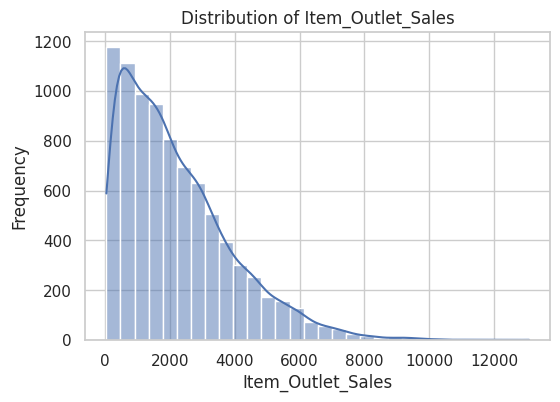

In [9]:
# Visualize the distribution of the target variable (Item_Outlet_Sales)
plt.figure(figsize=(6, 4))
sns.histplot(train_data['Item_Outlet_Sales'], bins=30, kde=True)
plt.title('Distribution of Item_Outlet_Sales')
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Frequency')
plt.show()

<ipython-input-10-be12fe093d35>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)


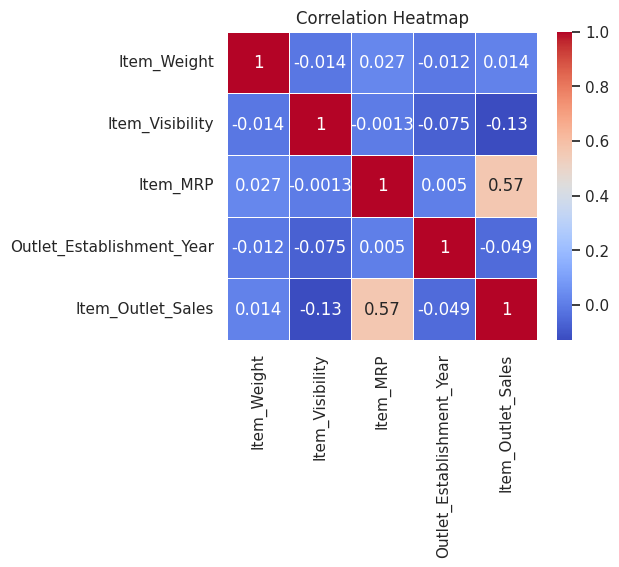

In [10]:
# Visualize correlations between numerical features
plt.figure(figsize=(5, 4))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-11-030bf92908eb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=train_data, palette='viridis')


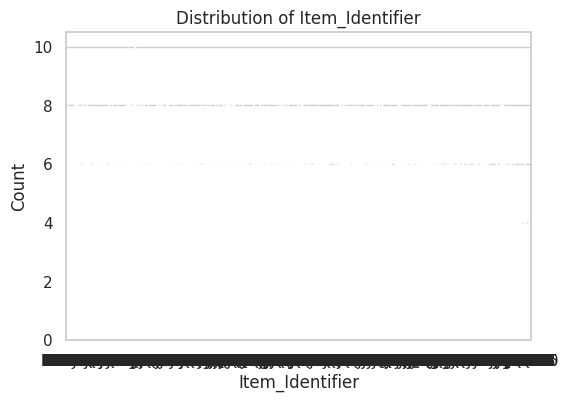

<ipython-input-11-030bf92908eb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=train_data, palette='viridis')


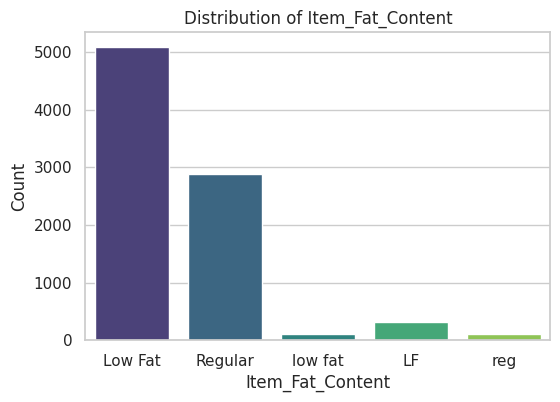

<ipython-input-11-030bf92908eb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=train_data, palette='viridis')


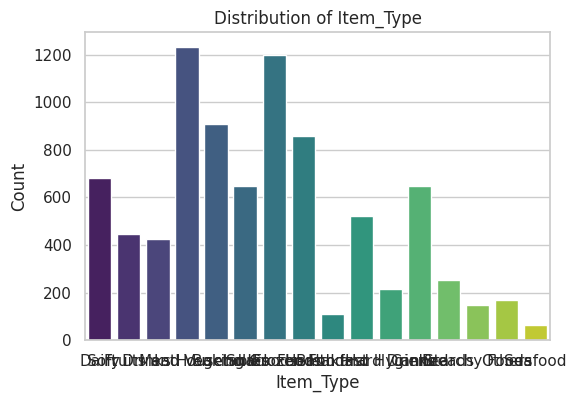

<ipython-input-11-030bf92908eb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=train_data, palette='viridis')


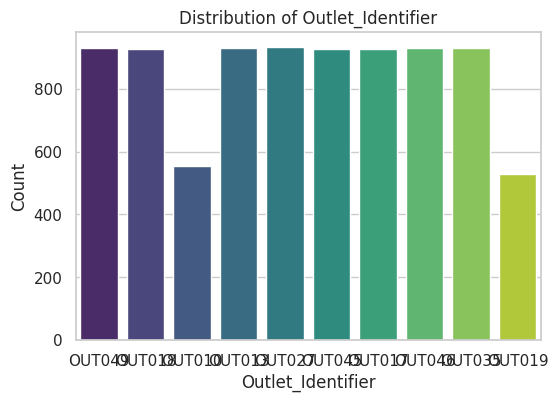

<ipython-input-11-030bf92908eb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=train_data, palette='viridis')


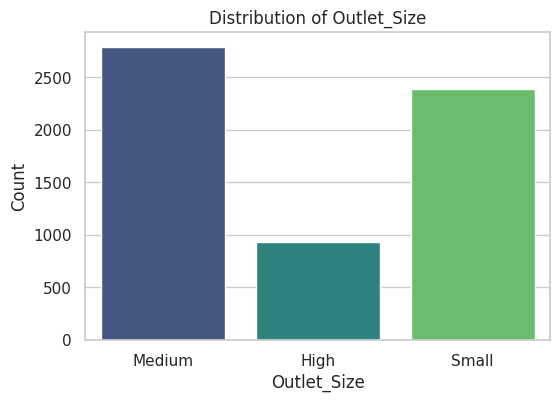

<ipython-input-11-030bf92908eb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=train_data, palette='viridis')


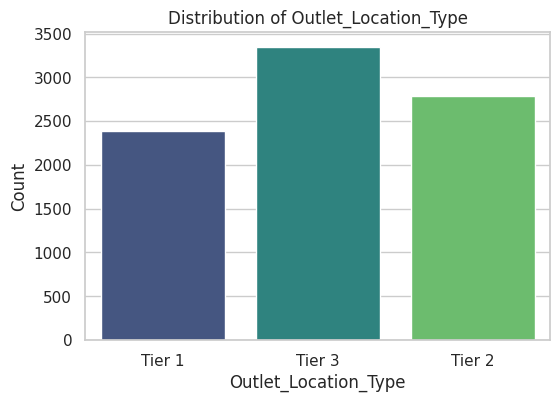

<ipython-input-11-030bf92908eb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=train_data, palette='viridis')


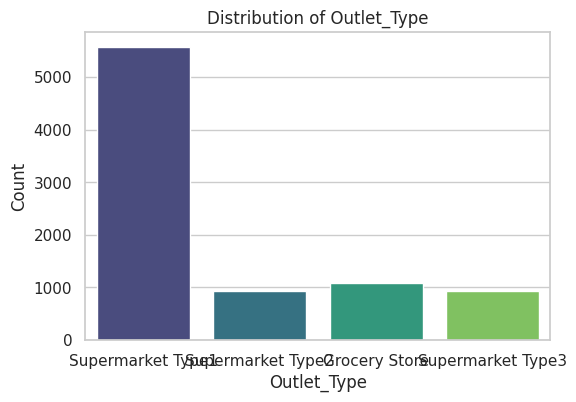

In [11]:
# Explore categorical variables
categorical_columns = train_data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x=column, data=train_data, palette='viridis')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

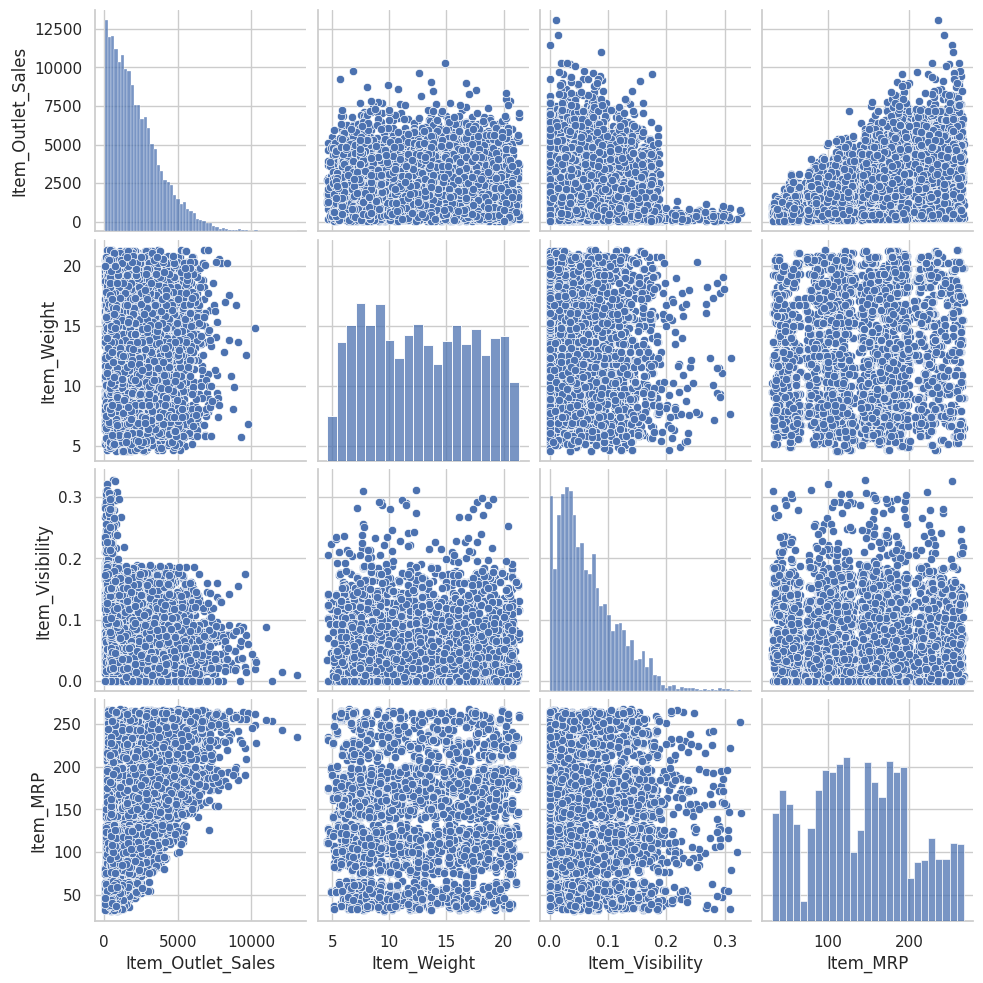

In [12]:
# Pairwise scatter plots for numerical features
sns.pairplot(train_data, vars=['Item_Outlet_Sales', 'Item_Weight', 'Item_Visibility', 'Item_MRP'], kind='scatter')
plt.show()

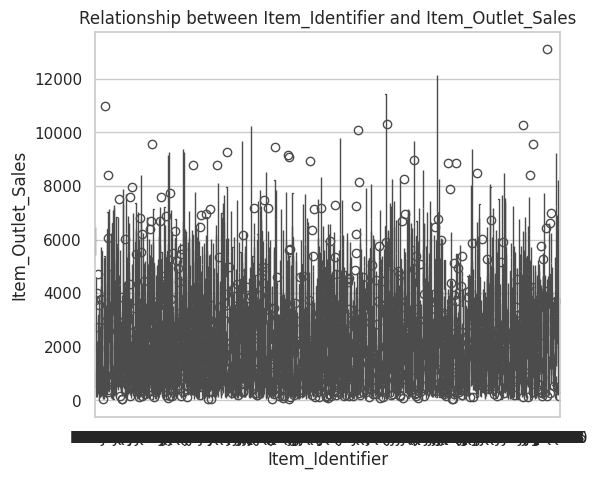

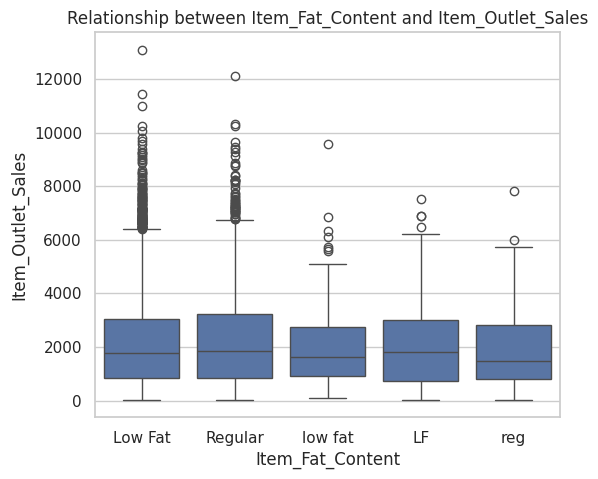

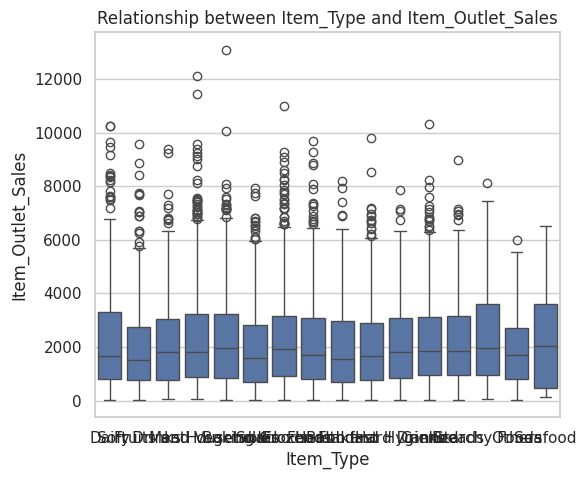

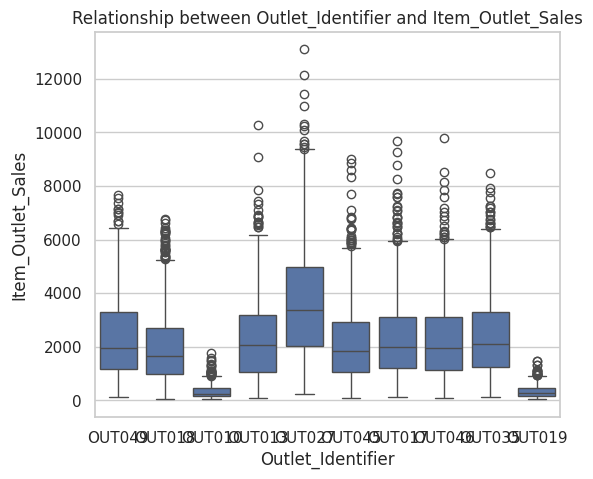

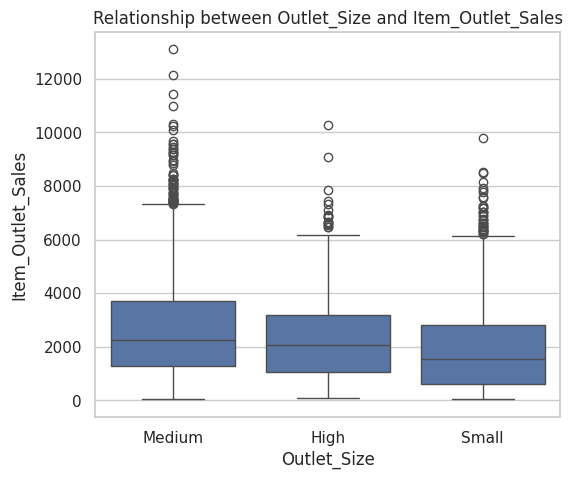

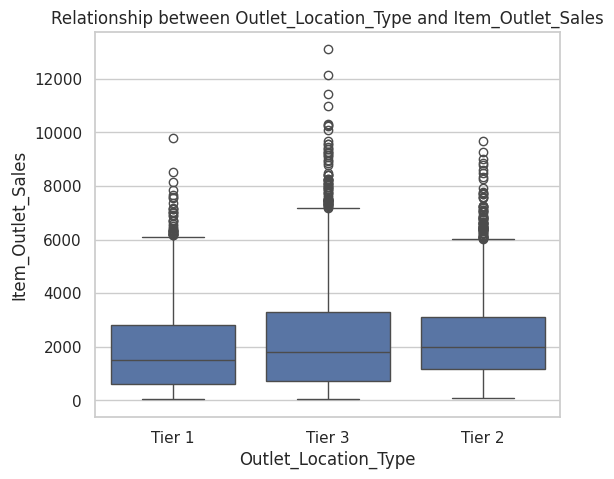

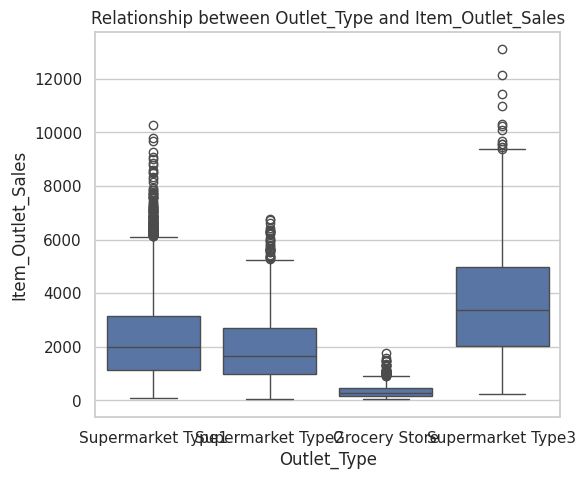

In [13]:
# Explore relationships between categorical features and the target variable
categorical_features = train_data.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(6, 5))
    sns.boxplot(x=feature, y='Item_Outlet_Sales', data=train_data)
    plt.title(f'Relationship between {feature} and Item_Outlet_Sales')
    plt.xlabel(feature)
    plt.ylabel('Item_Outlet_Sales')
    plt.show()

6).Univariate Analysis

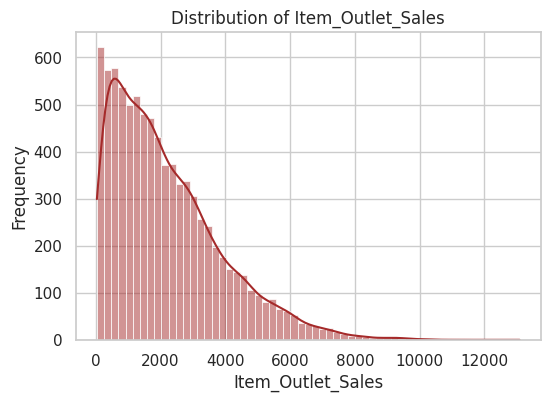

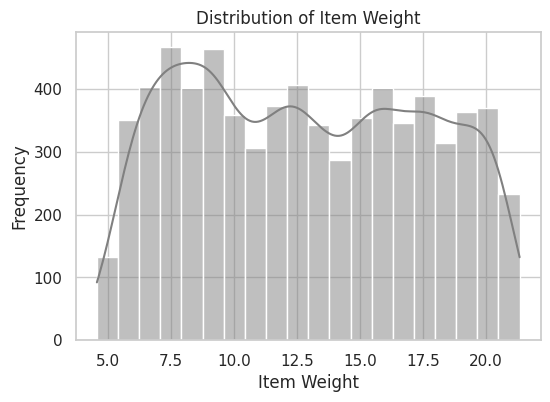

<ipython-input-14-3278652b697e>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Item_Type', data=train_data, palette='viridis')


Text(0, 0.5, 'Count')

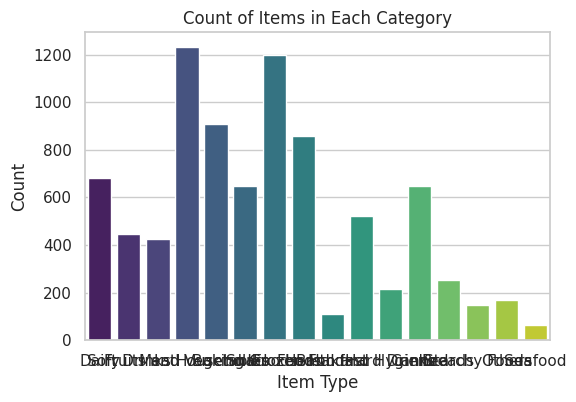

In [14]:
# Distribution of the target variable 'Item_Outlet_Sales'
plt.figure(figsize=(6, 4))
sns.histplot(train_data['Item_Outlet_Sales'], kde=True, color='Brown')
plt.title('Distribution of Item_Outlet_Sales')
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Frequency')
plt.show()

# Distribution of a numerical feature 'Item_Weight'
plt.figure(figsize=(6, 4))
sns.histplot(train_data['Item_Weight'].dropna(), kde=True, color='gray')
plt.title('Distribution of Item Weight')
plt.xlabel('Item Weight')
plt.ylabel('Frequency')
plt.show()

# Count of categorical variable 'Item_Type'
plt.figure(figsize=(6, 4))
sns.countplot(x='Item_Type', data=train_data, palette='viridis')
plt.title('Count of Items in Each Category')
plt.xlabel('Item Type')
plt.ylabel('Count')

7).Bivariate Analysis

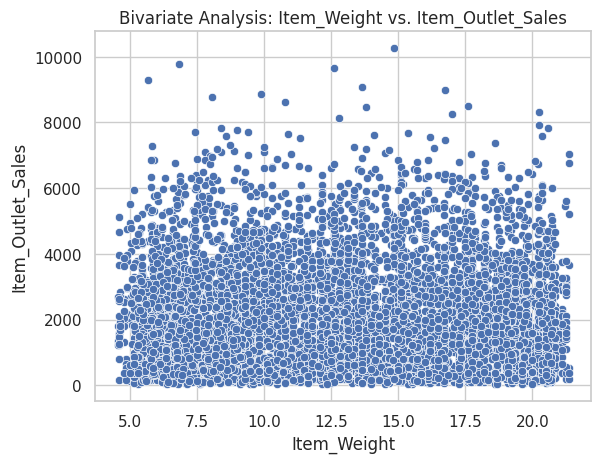

In [15]:
#Bivariate Analysis between 'Item_Weight' and 'Item_Outlet_Sales'
sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales', data=train_data)
plt.title('Bivariate Analysis: Item_Weight vs. Item_Outlet_Sales')
plt.show()

8).Missing Value Treatment

In [16]:
# Check for missing values in the training data
print("Missing values in the training data:")
print(train_data.isnull().sum())

# Check for missing values in the test data
print("\nMissing values in the test data:")
print(test_data.isnull().sum())

# Handling missing values in the training data
train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean(), inplace=True)
train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode()[0], inplace=True)

# Handling missing values in the test data
test_data['Item_Weight'].fillna(test_data['Item_Weight'].mean(), inplace=True)
test_data['Outlet_Size'].fillna(test_data['Outlet_Size'].mode()[0], inplace=True)

# Verify that missing values have been addressed
print("\nMissing values after treatment in the training data:")
print(train_data.isnull().sum())

print("\nMissing values after treatment in the test data:")
print(test_data.isnull().sum())

Missing values in the training data:
Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Missing values in the test data:
Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

Missing values after treatment in the training data:
Item_Identifier              0
Item_Weight                  0
Item_

9).Feature Engineering

In [17]:
# Creating a new feature 'Total_Sales' by combining 'Item_MRP' and 'Item_Outlet_Sales'
train_data['Total_Sales'] = train_data['Item_MRP'] * train_data['Item_Outlet_Sales']

# Extracting information from 'Item_Identifier'
train_data['Item_Type_Category'] = train_data['Item_Fat_Content'].str[:2]  # Extract the first two characters
train_data['Item_Type_Category'] = train_data['Item_Type_Category'].map({'FD': 'Food', 'DR': 'Drink', 'NC': 'Non-Consumable'})

# Aggregating sales by 'Outlet_Identifier'
outlet_sales = train_data.groupby('Outlet_Identifier')['Item_Outlet_Sales'].transform('mean')
train_data['Avg_Outlet_Sales'] = outlet_sales

# Creating a feature 'Outlet_Years' representing the years since the outlet establishment
train_data['Outlet_Years'] = 2022 - train_data['Outlet_Establishment_Year']

# Display the modified DataFrame
print(train_data.head())


  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

10).Encoding Categorical Variables

a. Label Encoding:
Encode categorical variables using label encoding.

b. One Hot Encoding:
Encode categorical variables using one-hot encoding.

11).Label Encoding

12).One Hot Encoding

In [18]:
# Combining train and test datasets for consistent encoding
combined_data = pd.concat([train_data, test_data], axis=0)

# Performing One-Hot Encoding
combined_data_encoded = pd.get_dummies(combined_data, columns=['Outlet_Location_Type'], drop_first=True)

# Spliting the combined dataset back into train and test datasets
train_data_encoded = combined_data_encoded[:len(train_data)]
test_data_encoded = combined_data_encoded[len(train_data):]

# Verifying the encoding results
print("Encoded Train Data:")
print(train_data_encoded.head())

print("\nEncoded Test Data:")
print(test_data_encoded.head())

Encoded Train Data:
  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size        Outlet_Type  \
0                       1999      Medium  Supermarket Type1   
1                       2009      Medium  Supermarket Type2   
2                       1999      Medium  Sup

13).PreProcessing Data

In [19]:
# Checking for string columns
string_columns = train_data.select_dtypes(include=['object']).columns

# Converting strings to float using Label Encoding
label_encoder = LabelEncoder()

for col in string_columns:
    if col != 'Item_Identifier':
        train_data[col] = label_encoder.fit_transform(train_data[col])

# Handling missing values
train_data.fillna(train_data.mean(), inplace=True)

# Scaling or Normalizing numerical features (optional)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_columns = train_data.select_dtypes(include=['float64']).columns
train_data[numerical_columns] = scaler.fit_transform(train_data[numerical_columns])

# Display the preprocessed data
print("Preprocessed Data:")
print(train_data.head())

Preprocessed Data:
  Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  \
0           FDA15    -0.841872                 1        -0.970732          4   
1           DRC01    -1.641706                 2        -0.908111         14   
2           FDN15     1.098554                 1        -0.956917         10   
3           FDX07     1.500838                 2        -1.281758          6   
4           NCD19    -0.929428                 1        -1.281758          9   

   Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
0  1.747454                  9                       1999            1   
1 -1.489023                  3                       2009            1   
2  0.010040                  9                       1999            1   
3  0.660050                  0                       1998            1   
4 -1.399220                  1                       1987            0   

   Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales

<ipython-input-19-d27923771d74>:12: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.fillna(train_data.mean(), inplace=True)


14).Modeling

In [20]:
# Separating the features and target variable
X = train_data.drop(['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'], axis=1)  # Exclude non-numeric columns
y = train_data['Item_Outlet_Sales']

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

15).Linear Regression

In [21]:
# Initializing Linear Regression model
linear_reg_model = LinearRegression()

# Fitting the model to the training data
linear_reg_model.fit(X_train, y_train)

# Make predictions on the test set
linear_reg_predictions = linear_reg_model.predict(X_test)

# Evaluate the model
linear_reg_rmse = np.sqrt(mean_squared_error(y_test, linear_reg_predictions))
print("Linear Regression RMSE:", linear_reg_rmse)

Linear Regression RMSE: 0.2496260279524986


16).Regularized Linear Regression

In [22]:
# Initialize Ridge regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter for stronger or weaker regularization

# Fitting the model to the training data
ridge_model.fit(X_train, y_train)

# Predict on the test set
ridge_predictions = ridge_model.predict(X_test)

# Evaluate the model
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_predictions))
print("Ridge Regression RMSE:", ridge_rmse)

Ridge Regression RMSE: 0.24963270950018235


17).RandomForest

In [23]:
# Create a RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fitting the model to the training data
rf_model.fit(X_train, y_train)

# Predict on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
print("RandomForest RMSE:", rf_rmse)

RandomForest RMSE: 0.03000623688307926


18).XGBoost

In [24]:
from xgboost import XGBRegressor
# Create an XGBRegressor model
xgb_model = XGBRegressor()

# Fitting the model to the training data
xgb_model.fit(X_train, y_train)

# Predict on the test set
xgb_predictions = xgb_model.predict(X_test)

# Evaluate the model
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions))
print("XGBoost RMSE:", xgb_rmse)

XGBoost RMSE: 0.056606894391826416


19).Summary

After a comprehensive analysis of various regression models, including Linear Regression, Regularized Linear Regression (Ridge), RandomForest, and XGBoost, it is evident that "Random Forest model" achieved the lowest RMSE compared to the other models. The lower RMSE implies higher accuracy in predicting sales,and provides the best predictive performance for the BigMart sales prediction project.
